In [ ]:
import pandas as pd
import numpy as np
import tensorflow as tf

In [ ]:
# original dataset made public to make this ipynb universal
df_original_url_public = 'https://drive.google.com/file/d/14YOdY371xFEwnfsvKGcp9K-aj8FRe-XO/view?usp=sharing'
df_original_url_processed = 'https://drive.google.com/uc?id=' + df_original_url_public.split('/')[-2]
df = pd.read_csv(df_original_url_processed)

In [ ]:
df.head()

,userid,user_state,event_name,event_attributes,event_created_date,event_platform,device_manufacture,device_model
0,c95c777785faec8dd910d019d7278ebe,CA,Add Vehicle Success,"{""Make"":""Dodge"",""Model"":""Caravan"",""Color"":""Whi...",2022-01-16 17:03:04,android,samsung,SM-N975U
1,c95c777785faec8dd910d019d7278ebe,CA,Add Vehicle Break,{},2022-01-16 17:07:47,android,samsung,SM-N975U
2,f344be2d9a042b7444f3cc5279e38ef1,FL,Calculator View,{},2022-01-16 17:16:25,android,samsung,SM-G973U1
3,c95c777785faec8dd910d019d7278ebe,CA,Add Payment Method Success,"{""Payment Method"":""Credit"",""Tokenized Pay"":""""}",2022-01-16 17:24:22,android,samsung,SM-N975U
4,e331ed81422d8fba55520a43a872e701,IL,Sign Up Success,"{""Method"":""Apple""}",2022-01-16 17:34:51,ios,Apple,"iPhone12,1"


In [ ]:
cancel_id = (df[df['event_name'] == 'Subscription Premium Cancel']['userid'].unique())
sub_id = (df[(df['event_name'] == 'Subscription Premium') | (df['event_name'] == 'Subscription Premium Renew')]['userid'].unique())
df_target = df[(df['userid'].isin(sub_id)) | (df['userid'].isin(cancel_id))].copy()
df_target['canceled'] = df_target['userid'].apply(lambda x: True if x in cancel_id else False)

In [ ]:
df_target

,userid,user_state,event_name,event_attributes,event_created_date,event_platform,device_manufacture,device_model,canceled
2,f344be2d9a042b7444f3cc5279e38ef1,FL,Calculator View,{},2022-01-16 17:16:25,android,samsung,SM-G973U1,False
19,9a52cf418ad2a4261777f64bb60dd365,TX,Wallet Opened,{},2022-01-16 20:29:06,ios,Apple,"iPhone12,1",False
28,017f4557810b3ba165d2959c17b916b6,TX,Sign Up Success,"{""Method"":""Email""}",2022-01-17 00:00:47,ios,Apple,"iPhone13,4",False
29,017f4557810b3ba165d2959c17b916b6,TX,Email Confirmation Success,"{""Required"":""true""}",2022-01-17 00:01:19,ios,Apple,"iPhone13,4",False
30,017f4557810b3ba165d2959c17b916b6,TX,Account Setup Skip,{},2022-01-17 00:02:19,ios,Apple,"iPhone13,4",False
...,...,...,...,...,...,...,...,...,...
23352,679eba26c4e75e0afb178360becfa21b,CA,Add Payment Method Success,"{""Payment Method"":""Credit"",""Tokenized Pay"":"""",...",2022-04-16 20:49:24,android,Google,Pixel 3a,False
23353,679eba26c4e75e0afb178360becfa21b,CA,Account Setup Profile Skip,"{""Screen"":""Address""}",2022-04-16 20:50:05,android,Google,Pixel 3a,False
23354,679eba26c4e75e0afb178360becfa21b,CA,Account Setup Profile Skip,"{""Screen"":""Phone Number""}",2022-04-16 20:50:10,android,Google,Pixel 3a,False
23355,679eba26c4e75e0afb178360becfa21b,CA,Chat Conversation Opened,"{""From"":""Dashboard"",""Transaction type"":""""}",2022-04-16 20:50:31,android,Google,Pixel 3a,False


In [ ]:
del df
del df_target['event_attributes']

In [ ]:
df_target

,userid,user_state,event_name,event_created_date,event_platform,device_manufacture,device_model,canceled
2,f344be2d9a042b7444f3cc5279e38ef1,FL,Calculator View,2022-01-16 17:16:25,android,samsung,SM-G973U1,False
19,9a52cf418ad2a4261777f64bb60dd365,TX,Wallet Opened,2022-01-16 20:29:06,ios,Apple,"iPhone12,1",False
28,017f4557810b3ba165d2959c17b916b6,TX,Sign Up Success,2022-01-17 00:00:47,ios,Apple,"iPhone13,4",False
29,017f4557810b3ba165d2959c17b916b6,TX,Email Confirmation Success,2022-01-17 00:01:19,ios,Apple,"iPhone13,4",False
30,017f4557810b3ba165d2959c17b916b6,TX,Account Setup Skip,2022-01-17 00:02:19,ios,Apple,"iPhone13,4",False
...,...,...,...,...,...,...,...,...
23352,679eba26c4e75e0afb178360becfa21b,CA,Add Payment Method Success,2022-04-16 20:49:24,android,Google,Pixel 3a,False
23353,679eba26c4e75e0afb178360becfa21b,CA,Account Setup Profile Skip,2022-04-16 20:50:05,android,Google,Pixel 3a,False
23354,679eba26c4e75e0afb178360becfa21b,CA,Account Setup Profile Skip,2022-04-16 20:50:10,android,Google,Pixel 3a,False
23355,679eba26c4e75e0afb178360becfa21b,CA,Chat Conversation Opened,2022-04-16 20:50:31,android,Google,Pixel 3a,False


In [ ]:
df_target

,userid,user_state,event_name,event_created_date,event_platform,device_manufacture,device_model,canceled
2,f344be2d9a042b7444f3cc5279e38ef1,FL,Calculator View,2022-01-16 17:16:25,android,samsung,SM-G973U1,False
19,9a52cf418ad2a4261777f64bb60dd365,TX,Wallet Opened,2022-01-16 20:29:06,ios,Apple,"iPhone12,1",False
28,017f4557810b3ba165d2959c17b916b6,TX,Sign Up Success,2022-01-17 00:00:47,ios,Apple,"iPhone13,4",False
29,017f4557810b3ba165d2959c17b916b6,TX,Email Confirmation Success,2022-01-17 00:01:19,ios,Apple,"iPhone13,4",False
30,017f4557810b3ba165d2959c17b916b6,TX,Account Setup Skip,2022-01-17 00:02:19,ios,Apple,"iPhone13,4",False
...,...,...,...,...,...,...,...,...
23352,679eba26c4e75e0afb178360becfa21b,CA,Add Payment Method Success,2022-04-16 20:49:24,android,Google,Pixel 3a,False
23353,679eba26c4e75e0afb178360becfa21b,CA,Account Setup Profile Skip,2022-04-16 20:50:05,android,Google,Pixel 3a,False
23354,679eba26c4e75e0afb178360becfa21b,CA,Account Setup Profile Skip,2022-04-16 20:50:10,android,Google,Pixel 3a,False
23355,679eba26c4e75e0afb178360becfa21b,CA,Chat Conversation Opened,2022-04-16 20:50:31,android,Google,Pixel 3a,False


In [ ]:
df_target = df_target[df_target['event_name']!='Subscription Premium Cancel']
req_one_hot_cols = set(df_target.columns)-set(['userid','canceled','event_created_date'])

# data preparation for RNN
one_hot_df = pd.get_dummies(df_target[list(req_one_hot_cols)],dummy_na=True)
X = []
Y = []
for userid in df_target['userid'].unique():
  cur_rows_df_target = df_target[df_target['userid']==userid]
  y = cur_rows_df_target.iloc[0,-1]
  indexes = cur_rows_df_target.index
  X.append(one_hot_df.loc[indexes].values)
  Y.append(y)

X = tf.keras.utils.pad_sequences(X)
Y = np.array(Y).astype(float)

In [ ]:
one_hot_df.dtypes.value_counts()

uint8    230
dtype: int64

In [ ]:
X.shape

(794, 498, 230)

In [ ]:
X = tf.cast(X, tf.float32)
Y = tf.cast(Y, tf.float32)

In [ ]:
model = tf.keras.Sequential([tf.keras.layers.LSTM(128,
                                                  kernel_regularizer=tf.keras.regularizers.L1L2(l1=1e-5, l2=1e-4),
                                                  bias_regularizer=tf.keras.regularizers.L2(1e-4),
                                                  activity_regularizer=tf.keras.regularizers.L2(1e-5)),
                             tf.keras.layers.Dropout(0.8),
                             tf.keras.layers.Dense(1,'sigmoid')])

model.compile(loss=tf.keras.losses.BinaryCrossentropy(),
              optimizer=tf.keras.optimizers.Adam(1e-4),
              metrics=['accuracy',tf.keras.metrics.Recall(),tf.keras.metrics.Precision()])

In [ ]:
history = model.fit(X,Y,epochs=90,batch_size=64,validation_split=0.2)

Epoch 1/90
10/10 [==============================] - 4s 166ms/step - loss: 0.7999 - accuracy: 0.5008 - recall_1: 0.5371 - precision_1: 0.3683 - val_loss: 0.7902 - val_accuracy: 0.5472 - val_recall_1: 0.5455 - val_precision_1: 0.1622
Epoch 2/90
10/10 [==============================] - 1s 71ms/step - loss: 0.7797 - accuracy: 0.5465 - recall_1: 0.4672 - precision_1: 0.3919 - val_loss: 0.7709 - val_accuracy: 0.6604 - val_recall_1: 0.5000 - val_precision_1: 0.2037
Epoch 3/90
10/10 [==============================] - 1s 57ms/step - loss: 0.7557 - accuracy: 0.5921 - recall_1: 0.3886 - precision_1: 0.4279 - val_loss: 0.7533 - val_accuracy: 0.7170 - val_recall_1: 0.3636 - val_precision_1: 0.2051
Epoch 4/90
10/10 [==============================] - 1s 53ms/step - loss: 0.7418 - accuracy: 0.6205 - recall_1: 0.3930 - precision_1: 0.4688 - val_loss: 0.7391 - val_accuracy: 0.7673 - val_recall_1: 0.3182 - val_precision_1: 0.2414
Epoch 5/90
10/10 [==============================] - 1s 54ms/step - loss: 0.

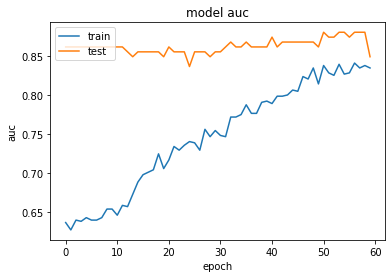

In [ ]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model auc')
plt.ylabel('auc')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()